# Schwarzschild spacetime

This worksheet demonstrates a few capabilities of <a href="http://sagemanifolds.obspm.fr/">SageManifolds</a> (version 0.9.1) in computations regarding Schwarzschild spacetime.

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Worksheets/v0.9.1/SM_Schwarzschild.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath with the Jupyter notebook, via the command `sage -n jupyter`


First we set up the notebook to display mathematical objects using LaTeX formatting:

In [1]:
%display latex

## Spacetime manifold

We declare the Schwarzschild spacetime as a 4-dimensional differentiable manifold:

In [2]:
M = Manifold(4, 'M', r'\mathcal{M}') ; M

4-dimensional differentiable manifold M

In [3]:
print(M)

4-dimensional differentiable manifold M


<p>The spacetime manifold $\mathcal{M}$ can be split into 4 regions, corresponding to the 4 quadrants in the Kruskal diagram.Let us denote by $\mathcal{R}_{\mathrm{I}}$ to $\mathcal{R}_{\mathrm{IV}}$ the interiors of these 4 regions. $\mathcal{R}_{\mathrm{I}}$ and  $\mathcal{R}_{\mathrm{III}}$  are asymtotically flat regions outside the event horizon;  $\mathcal{R}_{\mathrm{II}}$ is inside the future event horizon and $\mathcal{R}_{\mathrm{IV}}$ is inside the past event horizon.</p>

In [4]:
regI = M.open_subset('R_I', r'\mathcal{R}_{\mathrm{I}}')
regII = M.open_subset('R_II', r'\mathcal{R}_{\mathrm{II}}')
regIII = M.open_subset('R_III', r'\mathcal{R}_{\mathrm{III}}')
regIV = M.open_subset('R_IV', r'\mathcal{R}_{\mathrm{IV}}')
regI, regII, regIII, regIV

(Open subset R_I of the 4-dimensional differentiable manifold M,
 Open subset R_II of the 4-dimensional differentiable manifold M,
 Open subset R_III of the 4-dimensional differentiable manifold M,
 Open subset R_IV of the 4-dimensional differentiable manifold M)

<p><span id="cell_outer_8">The parameter $m$ of </span><span id="cell_outer_8">the Schwarzschild spacetime is declared as a symbolic variable:</span></p>

In [5]:
m = var('m') ; assume(m>=0)

<h2>Boyer-Lindquist coordinates</h2>
<p>The standard Boyer-Lindquist coordinates (also called Schwarzschild coordinates) are defined on $\mathcal{R}_{\mathrm{I}}\cup \mathcal{R}_{\mathrm{II}}$</p>

In [6]:
regI_II = regI.union(regII) ; regI_II

Open subset R_I_union_R_II of the 4-dimensional differentiable manifold M

In [7]:
X.<t,r,th,ph> = regI_II.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
print(X)

Chart (R_I_union_R_II, (t, r, th, ph))


In [8]:
X

Chart (R_I_union_R_II, (t, r, th, ph))

<p>We naturally introduce two subcharts as the restrictions of the chart $X$ to regions $\mathcal{R}_{\mathrm{I}}$ and $\mathcal{R}_{\mathrm{II}}$ respectively. Since, in terms of the Boyer-Lindquist coordinates, $\mathcal{R}_{\mathrm{I}}$ (resp. $\mathcal{R}_{\mathrm{II}}$) is defined by $r>2m$ (resp. $r<2m$), we set</p>

In [9]:
X_I = X.restrict(regI, r>2*m) ; X_I

Chart (R_I, (t, r, th, ph))

In [10]:
X_II = X.restrict(regII, r<2*m) ; X_II

Chart (R_II, (t, r, th, ph))

<p>At this stage, the manifold's atlas has 3 charts:</p>

In [11]:
M.atlas()

[Chart (R_I_union_R_II, (t, r, th, ph)),
 Chart (R_I, (t, r, th, ph)),
 Chart (R_II, (t, r, th, ph))]

In [12]:
M.default_chart()

Chart (R_I_union_R_II, (t, r, th, ph))

<p>Three vector frames have been defined on the manifold: the three coordinate frames:</p>

In [13]:
M.frames()

[Coordinate frame (R_I_union_R_II, (d/dt,d/dr,d/dth,d/dph)),
 Coordinate frame (R_I, (d/dt,d/dr,d/dth,d/dph)),
 Coordinate frame (R_II, (d/dt,d/dr,d/dth,d/dph))]

In [14]:
print(M.default_frame())

Coordinate frame (R_I_union_R_II, (d/dt,d/dr,d/dth,d/dph))


In [15]:
M.default_frame().domain()

Open subset R_I_union_R_II of the 4-dimensional differentiable manifold M

<h2>Metric tensor</h2>
<p>The metric tensor is defined as follows:</p>

In [16]:
g = M.lorentzian_metric('g')
print(g)

Lorentzian metric g on the 4-dimensional differentiable manifold M


<p><span>The metric tensor is set by its components in the coordinate frame associated with Schwarzschild coordinates, which is the current manifold's default frame:</span></p>

In [17]:
g[0,0], g[1,1] = -(1-2*m/r), 1/(1-2*m/r)
g[2,2], g[3,3] = r^2, (r*sin(th))^2

In [18]:
g.display()

g = (2*m/r - 1) dt*dt - 1/(2*m/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

<p>As an example, let us consider a vector field defined only on $\mathcal{R}_{\mathrm{I}}$:</p>

In [19]:
v = regI.vector_field('v')
v[0] = 1
v[1] = 1 - 2*m/r
# unset components are zero   
v.display()

v = d/dt + (-2*m/r + 1) d/dr

In [20]:
v.domain()

Open subset R_I of the 4-dimensional differentiable manifold M

In [21]:
g.domain()

4-dimensional differentiable manifold M

<p>Since $\mathcal{R}_{\mathrm{I}}\subset \mathcal{M}$, it is possible to apply $g$ to $v$:</p>

In [22]:
s = g(v,v) ; print(s)

Scalar field g(v,v) on the Open subset R_I of the 4-dimensional differentiable manifold M


In [23]:
s.display() # v is indeed a null vector

g(v,v): R_I --> R
   (t, r, th, ph) |--> 0

<div id="cell_text_59" class="text_cell">
<h2>Levi-Civita Connection</h2>
</div>
<div id="insert_new_cell_before27" class="insert_new_cell"> </div>
<div id="cell_text_27" class="text_cell">
<p>The Levi-Civita connection $\nabla$ associated with $g$:</p>
</div>

In [24]:
nab = g.connection() ; print(nab)

Levi-Civita connection nabla_g associated with the Lorentzian metric g on the 4-dimensional differentiable manifold M


<p>Let us verify that the covariant derivative of $g$ with respect to $\nabla$ vanishes identically:</p>

In [25]:
nab(g) == 0

True

In [26]:
nab(g).display()

nabla_g(g) = 0

<p>The nonzero Christoffel symbols of $g$ with respect to Schwarzschild coordinates, skipping those that can be deduced by symmetry:</p>

In [27]:
g.christoffel_symbols_display()

Gam^t_t,r = -m/(2*m*r - r^2) 
Gam^r_t,t = -(2*m^2 - m*r)/r^3 
Gam^r_r,r = m/(2*m*r - r^2) 
Gam^r_th,th = 2*m - r 
Gam^r_ph,ph = (2*m - r)*sin(th)^2 
Gam^th_r,th = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th)

<h2>Curvature</h2>

<p>The Riemann curvature tensor associated with $g$:</p>

In [28]:
R = g.riemann() ; print(R)

Tensor field Riem(g) of type (1,3) on the 4-dimensional differentiable manifold M


<p>The Weyl conformal tensor associated with $g$:</p>

In [29]:
C = g.weyl() ; print(C)

Tensor field C(g) of type (1,3) on the 4-dimensional differentiable manifold M


In [30]:
C.display()

C(g) = -2*m/(2*m*r^2 - r^3) d/dt*dr*dt*dr + 2*m/(2*m*r^2 - r^3) d/dt*dr*dr*dt - m/r d/dt*dth*dt*dth + m/r d/dt*dth*dth*dt - m*sin(th)^2/r d/dt*dph*dt*dph + m*sin(th)^2/r d/dt*dph*dph*dt - 2*(2*m^2 - m*r)/r^4 d/dr*dt*dt*dr + 2*(2*m^2 - m*r)/r^4 d/dr*dt*dr*dt - m/r d/dr*dth*dr*dth + m/r d/dr*dth*dth*dr - m*sin(th)^2/r d/dr*dph*dr*dph + m*sin(th)^2/r d/dr*dph*dph*dr + (2*m^2 - m*r)/r^4 d/dth*dt*dt*dth - (2*m^2 - m*r)/r^4 d/dth*dt*dth*dt - m/(2*m*r^2 - r^3) d/dth*dr*dr*dth + m/(2*m*r^2 - r^3) d/dth*dr*dth*dr + 2*m*sin(th)^2/r d/dth*dph*dth*dph - 2*m*sin(th)^2/r d/dth*dph*dph*dth + (2*m^2 - m*r)/r^4 d/dph*dt*dt*dph - (2*m^2 - m*r)/r^4 d/dph*dt*dph*dt - m/(2*m*r^2 - r^3) d/dph*dr*dr*dph + m/(2*m*r^2 - r^3) d/dph*dr*dph*dr - 2*m/r d/dph*dth*dth*dph + 2*m/r d/dph*dth*dph*dth

<p>The Ricci tensor associated with $g$:</p>

In [31]:
Ric = g.ricci() ; print(Ric)

Field of symmetric bilinear forms Ric(g) on the 4-dimensional differentiable manifold M


<h3>Einstein equation</h3>
<p>Let us check that the Schwarzschild metric is a solution of the vacuum Einstein equation:</p>

In [32]:
Ric == 0

True

In [33]:
Ric.display() # another view of the above

Ric(g) = 0

<p>Contrary to the Ricci tensor, the Riemann tensor does not vanish:</p>

In [34]:
R[:]

[[[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]],
  [[0, -2*m/(2*m*r^2 - r^3), 0, 0],
   [2*m/(2*m*r^2 - r^3), 0, 0, 0],
   [0, 0, 0, 0],
   [0, 0, 0, 0]],
  [[0, 0, -m/r, 0], [0, 0, 0, 0], [m/r, 0, 0, 0], [0, 0, 0, 0]],
  [[0, 0, 0, -m*sin(th)^2/r],
   [0, 0, 0, 0],
   [0, 0, 0, 0],
   [m*sin(th)^2/r, 0, 0, 0]]],
 [[[0, -2*(2*m^2 - m*r)/r^4, 0, 0],
   [2*(2*m^2 - m*r)/r^4, 0, 0, 0],
   [0, 0, 0, 0],
   [0, 0, 0, 0]],
  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]],
  [[0, 0, 0, 0], [0, 0, -m/r, 0], [0, m/r, 0, 0], [0, 0, 0, 0]],
  [[0, 0, 0, 0],
   [0, 0, 0, -m*sin(th)^2/r],
   [0, 0, 0, 0],
   [0, m*sin(th)^2/r, 0, 0]]],
 [[[0, 0, (2*m^2 - m*r)/r^4, 0],
   [0, 0, 0, 0],
   [-(2*m^2 - m*r)/r^4, 0, 0, 0],
   [0, 0, 0, 0]],
  [[0, 0, 0, 0],
   [0, 0, -m/(2*m*r^2 - r^3), 0],
   [0, m/(2*m*r^2 - r^3), 0, 0],
   [0, 0, 0, 0]],
  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]],
  [[0, 0, 0, 0],
   [0, 0, 0, 0],
   [0, 0, 0, 2*m*sin(th)^2/r],
   [0, 0, -2*m*sin(th)^2/r, 0]]],
 [[[0, 0, 0, (2*m^2 - m*r)/r^4],
   [0, 0, 0, 0],
   [0, 0, 0, 0],
   [-(2*m^2 - m*r)/r^4, 0, 0, 0]],
  [[0, 0, 0, 0],
   [0, 0, 0, -m/(2*m*r^2 - r^3)],
   [0, 0, 0, 0],
   [0, m/(2*m*r^2 - r^3), 0, 0]],
  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, -2*m/r], [0, 0, 2*m/r, 0]],
  [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]]]

In [35]:
R.display()

Riem(g) = -2*m/(2*m*r^2 - r^3) d/dt*dr*dt*dr + 2*m/(2*m*r^2 - r^3) d/dt*dr*dr*dt - m/r d/dt*dth*dt*dth + m/r d/dt*dth*dth*dt - m*sin(th)^2/r d/dt*dph*dt*dph + m*sin(th)^2/r d/dt*dph*dph*dt - 2*(2*m^2 - m*r)/r^4 d/dr*dt*dt*dr + 2*(2*m^2 - m*r)/r^4 d/dr*dt*dr*dt - m/r d/dr*dth*dr*dth + m/r d/dr*dth*dth*dr - m*sin(th)^2/r d/dr*dph*dr*dph + m*sin(th)^2/r d/dr*dph*dph*dr + (2*m^2 - m*r)/r^4 d/dth*dt*dt*dth - (2*m^2 - m*r)/r^4 d/dth*dt*dth*dt - m/(2*m*r^2 - r^3) d/dth*dr*dr*dth + m/(2*m*r^2 - r^3) d/dth*dr*dth*dr + 2*m*sin(th)^2/r d/dth*dph*dth*dph - 2*m*sin(th)^2/r d/dth*dph*dph*dth + (2*m^2 - m*r)/r^4 d/dph*dt*dt*dph - (2*m^2 - m*r)/r^4 d/dph*dt*dph*dt - m/(2*m*r^2 - r^3) d/dph*dr*dr*dph + m/(2*m*r^2 - r^3) d/dph*dr*dph*dr - 2*m/r d/dph*dth*dth*dph + 2*m/r d/dph*dth*dph*dth

<p>The nonzero components of the Riemann tensor, skipping those that can be deduced by antisymmetry:</p>

In [36]:
R.display_comp(only_nonredundant=True)

Riem(g)^t_r,t,r = -2*m/(2*m*r^2 - r^3) 
Riem(g)^t_th,t,th = -m/r 
Riem(g)^t_ph,t,ph = -m*sin(th)^2/r 
Riem(g)^r_t,t,r = -2*(2*m^2 - m*r)/r^4 
Riem(g)^r_th,r,th = -m/r 
Riem(g)^r_ph,r,ph = -m*sin(th)^2/r 
Riem(g)^th_t,t,th = (2*m^2 - m*r)/r^4 
Riem(g)^th_r,r,th = -m/(2*m*r^2 - r^3) 
Riem(g)^th_ph,th,ph = 2*m*sin(th)^2/r 
Riem(g)^ph_t,t,ph = (2*m^2 - m*r)/r^4 
Riem(g)^ph_r,r,ph = -m/(2*m*r^2 - r^3) 
Riem(g)^ph_th,th,ph = -2*m/r

In [37]:
Ric[:]

[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]

<p>Since the Ricci tensor is zero, the Weyl tensor is of course equal to the Riemann tensor:</p>

In [38]:
C == R

True

<h3>Bianchi identity</h3>

<p>Let us check the Bianchi identity $\nabla_p R^i_{\ \, j kl} + \nabla_k R^i_{\ \, jlp} + \nabla_l R^i_{\ \, jpk} = 0$:</p>

In [39]:
DR = nab(R) ; print(DR)

Tensor field nabla_g(Riem(g)) of type (1,4) on the 4-dimensional differentiable manifold M


In [40]:
for i in M.irange():
    for j in M.irange():
        for k in M.irange():
            for l in M.irange():
                for p in M.irange():
                    print DR[i,j,k,l,p] + DR[i,j,l,p,k] + DR[i,j,p,k,l] ,

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

<p>Let us check that if we turn the first $+$ sign into a $-$ one, the Bianchi identity does no longer hold:</p>

In [41]:
for i in M.irange():
    for j in M.irange():
        for k in M.irange():
            for l in M.irange():
                for p in M.irange():
                    print DR[i,j,k,l,p] - DR[i,j,l,p,k] + DR[i,j,p,k,l] ,

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -12*m/(2*m*r^3 - r^4) 0 0 12*m/(2*m*r^3 - r^4) 0 0 0 0 0 0 0 0 0 0 0 0 0 -6*m/r^2 0 0 0 0 0 6*m/r^2 0 0 0 0 0 0 0 0 0 0 -6*m*sin(th)^2/r^2 0 0 0 0 0 0 0 0 6*m*sin(th)^2/r^2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -6*m/r^2 0 0 0 0 0 6*m/r^2 0 0 0 0 0 0 0 0 -6*m/r^2 0 0 6*m/r^2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -6*m*sin(th)^2/r^2 0 0 0 0 0 0 0 0 6*m*sin(th)^2/r^2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -6*m*sin(th)^2/r^2 0 0 6*m*sin(th)^2/r^2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -12*(2*m^2 - m*r)/r^5 0 0 12*(2*m^2 - m*r)/r^5 0 0 0 0 0 0 0 0 0 0 0 0 0 -6*(4*m^3 - 4*m^2*r + m*r^2)/r^4 0 0 0 0 0 6*(4*m^3 - 4*m^2*r + m*r^2)/r^4 0 0 0 0 0 0 0 0 0 0 -6*(4*m^3 - 4*m^2*r + m*r^2)*sin(th)^2/r^4 0 0 0 0 0 0 0 0 6*(4*m^3 - 4*m^2*r + m*r^2)*sin(th)^2/r^4 0 0 0 0 

<h3>Kretschmann scalar</h3>
<p>Let us first introduce tensor $R^\flat$, of components $R_{ijkl} = g_{ip} R^p_{\ \, jkl}$:</p>

In [42]:
dR = R.down(g) ; print(dR)

Tensor field of type (0,4) on the 4-dimensional differentiable manifold M


<p>and tensor $R^\sharp$, of components $R^{ijkl} = g^{jp} g^{kq} g^{lr} R^i_{\ \, pqr}$:</p>

In [43]:
uR = R.up(g) ; print(uR)

Tensor field of type (4,0) on the 4-dimensional differentiable manifold M


<p>The Kretschmann scalar is $K := R^{ijkl} R_{ijkl}$:</p>

In [44]:
Kr = 0
for i in M.irange():
    for j in M.irange():
        for k in M.irange():
            for l in M.irange():
                Kr += uR[i,j,k,l]*dR[i,j,k,l]
Kr

48*m^2/r^6

<p>Instead of the above loops, the Kretschmann scalar can also be computed by means of the contract() method, asking that the contraction takes place on all indices (positions 0, 1, 2, 3):</p>

In [45]:
Kr = uR.contract(0, 1, 2, 3, dR, 0, 1, 2, 3)
Kr.expr()

48*m^2/r^6

<p>The contraction can also be performed by means of index notations:</p>

In [46]:
Kr = uR['^{ijkl}']*dR['_{ijkl}']
Kr.expr()

48*m^2/r^6

<h2>Eddington-Finkelstein coordinates</h2>
<p>Let us introduce new coordinates on the spacetime manifold: the ingoing Eddington-Finkelstein ones:</p>

In [47]:
X_EF.<v,r,th,ph> = regI_II.chart(r'v r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\varphi')
print(X_EF) ; X_EF

Chart (R_I_union_R_II, (v, r, th, ph))


Chart (R_I_union_R_II, (v, r, th, ph))

<p>The change from Schwarzschild (Boyer-Lindquist) coordinates to the ingoing Eddington-Finkelstein ones:</p>

In [48]:
ch_BL_EF_I = X_I.transition_map(X_EF, [t+r+2*m*ln(r/(2*m)-1), r, th, ph], restrictions2=r>2*m)

In [49]:
print(ch_BL_EF_I) ; ch_BL_EF_I

Change of coordinates from Chart (R_I, (t, r, th, ph)) to Chart (R_I, (v, r, th, ph))


Change of coordinates from Chart (R_I, (t, r, th, ph)) to Chart (R_I, (v, r, th, ph))

In [50]:
ch_BL_EF_I.display()

v = 2*m*log(1/2*r/m - 1) + r + t
r = r
th = th
ph = ph

In [51]:
X_EF_I = X_EF.restrict(regI) ; X_EF_I

Chart (R_I, (v, r, th, ph))

In [52]:
ch_BL_EF_II = X_II.transition_map(X_EF, [t+r+2*m*ln(1-r/(2*m)), r, th, ph], restrictions2=r<2*m)

In [53]:
print(ch_BL_EF_II) ; ch_BL_EF_II

Change of coordinates from Chart (R_II, (t, r, th, ph)) to Chart (R_II, (v, r, th, ph))


Change of coordinates from Chart (R_II, (t, r, th, ph)) to Chart (R_II, (v, r, th, ph))

In [54]:
ch_BL_EF_II.display()

v = 2*m*log(-1/2*r/m + 1) + r + t
r = r
th = th
ph = ph

In [55]:
X_EF_II = X_EF.restrict(regII) ; X_EF_II

Chart (R_II, (v, r, th, ph))

<p>The manifold's atlas has now 6 charts:</p>

In [56]:
M.atlas()

[Chart (R_I_union_R_II, (t, r, th, ph)),
 Chart (R_I, (t, r, th, ph)),
 Chart (R_II, (t, r, th, ph)),
 Chart (R_I_union_R_II, (v, r, th, ph)),
 Chart (R_I, (v, r, th, ph)),
 Chart (R_II, (v, r, th, ph))]

<p>The default chart is 'BL':</p>

In [57]:
M.default_chart()

Chart (R_I_union_R_II, (t, r, th, ph))

<p>The change from Eddington-Finkelstein coordinates to the Schwarzschild (Boyer-Lindquist) ones, computed as the inverse of ch_BL_EF:</p>

In [58]:
ch_EF_BL_I = ch_BL_EF_I.inverse() ; print(ch_EF_BL_I)

Change of coordinates from Chart (R_I, (v, r, th, ph)) to Chart (R_I, (t, r, th, ph))


In [59]:
ch_EF_BL_I.display()

t = 2*m*log(2) + 2*m*log(m) - 2*m*log(-2*m + r) - r + v
r = r
th = th
ph = ph

In [60]:
ch_EF_BL_II = ch_BL_EF_II.inverse() ; print(ch_EF_BL_II)

Change of coordinates from Chart (R_II, (v, r, th, ph)) to Chart (R_II, (t, r, th, ph))


In [61]:
ch_EF_BL_II.display()

t = 2*m*log(2) - 2*m*log(2*m - r) + 2*m*log(m) - r + v
r = r
th = th
ph = ph

<p>At this stage, 6 vector frames have been defined on the manifold: the 6 coordinate frames associated with the various charts:</p>

In [62]:
M.frames()

[Coordinate frame (R_I_union_R_II, (d/dt,d/dr,d/dth,d/dph)),
 Coordinate frame (R_I, (d/dt,d/dr,d/dth,d/dph)),
 Coordinate frame (R_II, (d/dt,d/dr,d/dth,d/dph)),
 Coordinate frame (R_I_union_R_II, (d/dv,d/dr,d/dth,d/dph)),
 Coordinate frame (R_I, (d/dv,d/dr,d/dth,d/dph)),
 Coordinate frame (R_II, (d/dv,d/dr,d/dth,d/dph))]

<p>The default frame is:</p>

In [63]:
M.default_frame()

Coordinate frame (R_I_union_R_II, (d/dt,d/dr,d/dth,d/dph))

<p>The coframes are the duals of the defined vector frames:</p>

In [64]:
M.coframes()

[Coordinate coframe (R_I_union_R_II, (dt,dr,dth,dph)),
 Coordinate coframe (R_I, (dt,dr,dth,dph)),
 Coordinate coframe (R_II, (dt,dr,dth,dph)),
 Coordinate coframe (R_I_union_R_II, (dv,dr,dth,dph)),
 Coordinate coframe (R_I, (dv,dr,dth,dph)),
 Coordinate coframe (R_II, (dv,dr,dth,dph))]

<p>If not specified, tensor components are assumed to refer to the manifold's default frame. For instance, for the metric tensor:</p>

In [65]:
g.display()

g = (2*m/r - 1) dt*dt - 1/(2*m/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [66]:
g[:]

[     2*m/r - 1              0              0              0]
[             0 -1/(2*m/r - 1)              0              0]
[             0              0            r^2              0]
[             0              0              0  r^2*sin(th)^2]

<p>The tensor components in the frame associated with Eddington-Finkelstein coordinates in Region I are obtained by providing the frame to the function <span style="font-family: courier new,courier;">display()</span>:</p>

In [67]:
g.display(X_EF_I.frame())

g = (2*m - r)/r dv*dv + dv*dr + dr*dv + r^2 dth*dth + r^2*sin(th)^2 dph*dph

<p>They are also returned by the method comp(), with the frame as argument:</p>

In [68]:
g.comp(X_EF_I.frame())[:]

[  (2*m - r)/r             1             0             0]
[            1             0             0             0]
[            0             0           r^2             0]
[            0             0             0 r^2*sin(th)^2]

<p>or, as a schortcut,</p>

In [69]:
g[X_EF_I.frame(),:]

[  (2*m - r)/r             1             0             0]
[            1             0             0             0]
[            0             0           r^2             0]
[            0             0             0 r^2*sin(th)^2]

<p>Similarly, the metric<span id="cell_outer_53"> components in the frame associated with Eddington-Finkelstein coordinates in Region II are obtained by<br /></span></p>

In [70]:
g.display(X_EF_II.frame())

g = (2*m - r)/r dv*dv + dv*dr + dr*dv + r^2 dth*dth + r^2*sin(th)^2 dph*dph

<p><span id="cell_outer_56">Note that their form is identical to that in Region I.</span></p>

<h3>Plot of the Boyer-Lindquist coordinates in terms of the Eddington-Finkelstein ones</h3>
<p>Let us perform the plot in Region I:</p>

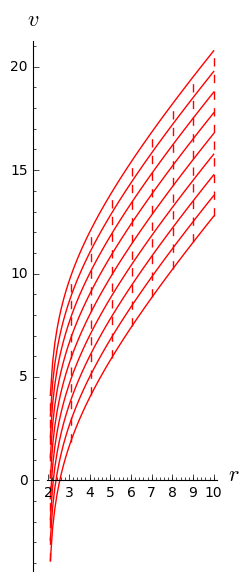

In [71]:
X_I.plot(X_EF_I, ranges={t:(0,8), r:(2.1,10)}, fixed_coords={th:pi/2,ph:0}, ambient_coords=(r,v), style={t:'--', r:'-'}, parameters={m:1})

<h2>Tetrad of the static observer</h2>
<p>Let us introduce the orthonormal tetrad $(e_\alpha)$ associated with the static observers in Schwarzschild spacetime, i.e. the observers whose worldlines are parallel to the timelike Killing vector in the Region I.</p>
<p>The orthonormal tetrad is defined via a tangent-space automorphism that relates it to the Boyer-Lindquist coordinate frame in Region I:</p>

In [72]:
ch_to_stat = regI.automorphism_field()
ch_to_stat[0,0], ch_to_stat[1,1] = 1/sqrt(1-2*m/r), sqrt(1-2*m/r)
ch_to_stat[2,2], ch_to_stat[3,3] = 1/r, 1/(r*sin(th))
ch_to_stat[:]

[1/sqrt(-2*m/r + 1)                  0                  0                  0]
[                 0   sqrt(-2*m/r + 1)                  0                  0]
[                 0                  0                1/r                  0]
[                 0                  0                  0      1/(r*sin(th))]

In [73]:
e = X_I.frame().new_frame(ch_to_stat, 'e') ; print(e)

Vector frame (R_I, (e_0,e_1,e_2,e_3))


<p>At this stage, 7 vector frames have been defined on the manifold $\mathcal{M}$:</p>

In [74]:
M.frames()

[Coordinate frame (R_I_union_R_II, (d/dt,d/dr,d/dth,d/dph)),
 Coordinate frame (R_I, (d/dt,d/dr,d/dth,d/dph)),
 Coordinate frame (R_II, (d/dt,d/dr,d/dth,d/dph)),
 Coordinate frame (R_I_union_R_II, (d/dv,d/dr,d/dth,d/dph)),
 Coordinate frame (R_I, (d/dv,d/dr,d/dth,d/dph)),
 Coordinate frame (R_II, (d/dv,d/dr,d/dth,d/dph)),
 Vector frame (R_I, (e_0,e_1,e_2,e_3))]

<p>The first vector of the tetrad is the static observer 4-velocity:</p>

In [75]:
print(e[0])

Vector field e_0 on the Open subset R_I of the 4-dimensional differentiable manifold M


In [76]:
e[0].display()

e_0 = 1/sqrt(-2*m/r + 1) d/dt

<p>As any 4-velocity, it is a unit timelike vector:</p>

In [77]:
g(e[0],e[0]).expr()

-1

<p>Let us check that the tetrad $(e_\alpha)$ is orthonormal:</p>

In [78]:
for i in M.irange():
    for j in M.irange():
        print g(e[i],e[j]).expr() , 
    print " "

-1 0 0 0  
0 1 0 0  
0 0 1 0  
0 0 0 1  


<p>Another view of the above result:</p>

In [79]:
g[e,:]

[-1  0  0  0]
[ 0  1  0  0]
[ 0  0  1  0]
[ 0  0  0  1]

<p>or, equivalently,</p>

In [80]:
g.display(e)

g = -e^0*e^0 + e^1*e^1 + e^2*e^2 + e^3*e^3

<p>The expression of the 4-velocity $e_0$ and the vector $e_1$ in terms of the frame associated with Eddington-Finkelstein coordinates:</p>

In [81]:
e[0].display(X_EF_I.frame())

e_0 = sqrt(r)/sqrt(-2*m + r) d/dv

In [82]:
e[1].display(X_EF_I.frame())

e_1 = sqrt(r)/sqrt(-2*m + r) d/dv + sqrt(-2*m + r)/sqrt(r) d/dr

<p>Contrary to vectors of a coordinate frame, the vectors of the tetrad $e$ do not commute: their structure coefficients are not identically zero:</p>

In [83]:
e.structure_coef()[:]

[[[0, -m*sqrt(-2*m + r)/((2*m*r - r^2)*sqrt(r)), 0, 0],
  [m*sqrt(-2*m + r)/((2*m*r - r^2)*sqrt(r)), 0, 0, 0],
  [0, 0, 0, 0],
  [0, 0, 0, 0]],
 [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]],
 [[0, 0, 0, 0],
  [0, 0, -sqrt(-2*m + r)/r^(3/2), 0],
  [0, sqrt(-2*m + r)/r^(3/2), 0, 0],
  [0, 0, 0, 0]],
 [[0, 0, 0, 0],
  [0, 0, 0, -sqrt(-2*m + r)/r^(3/2)],
  [0, 0, 0, -cos(th)/(r*sin(th))],
  [0, sqrt(-2*m + r)/r^(3/2), cos(th)/(r*sin(th)), 0]]]

<p>Equivalently, the Lie derivative of one vector along another one is not necessarily zero:</p>

In [84]:
e[0].lie_der(e[1]).display(e)

m*sqrt(-2*m + r)/((2*m*r - r^2)*sqrt(r)) e_0

<p>The curvature 2-form $\Omega^0_{\ \, 1}$ associated with the tetrad $(e_\alpha)$:</p>

In [85]:
g.connection().curvature_form(0,1,e).display(X_I.frame())

curvature (0,1) of connection nabla_g w.r.t. Vector frame (R_I, (e_0,e_1,e_2,e_3)) = 2*m/r^3 dt/\dr

<h2>Kruskal-Szekeres coordinates</h2>
<p>Let us now introduce the Kruskal-Szekeres coordinates $(U,V,\theta,\varphi)$ on the spacetime manifold, via the standard transformation expressing them in terms of the Boyer-Lindquist coordinates $(t,r,\theta,\varphi)$:</p>

In [86]:
M0 = regI.union(regII).union(regIII).union(regIV) ; M0

Open subset R_I_union_R_II_union_R_III_union_R_IV of the 4-dimensional differentiable manifold M

In [87]:
X_KS.<U,V,th,ph> = M0.chart(r'U V th:(0,pi):\theta ph:(0,2*pi):\varphi')
X_KS.add_restrictions(V^2 < 1 + U^2)
X_KS

Chart (R_I_union_R_II_union_R_III_union_R_IV, (U, V, th, ph))

In [88]:
X_KS_I = X_KS.restrict(regI, [U>0, V<U, V>-U]) ; X_KS_I

Chart (R_I, (U, V, th, ph))

In [89]:
ch_BL_KS_I = X_I.transition_map(X_KS_I, [sqrt(r/(2*m)-1)*exp(r/(4*m))*cosh(t/(4*m)), 
                                         sqrt(r/(2*m)-1)*exp(r/(4*m))*sinh(t/(4*m)), th, ph])
print(ch_BL_KS_I)
ch_BL_KS_I.display()

Change of coordinates from Chart (R_I, (t, r, th, ph)) to Chart (R_I, (U, V, th, ph))


U = sqrt(1/2*r/m - 1)*cosh(1/4*t/m)*e^(1/4*r/m)
V = sqrt(1/2*r/m - 1)*e^(1/4*r/m)*sinh(1/4*t/m)
th = th
ph = ph

In [90]:
X_KS_II = X_KS.restrict(regII, [V>0, V>U, V>-U]) ; X_KS_II

Chart (R_II, (U, V, th, ph))

In [91]:
ch_BL_KS_II = X_II.transition_map(X_KS_II, [sqrt(1-r/(2*m))*exp(r/(4*m))*sinh(t/(4*m)), 
                                            sqrt(1-r/(2*m))*exp(r/(4*m))*cosh(t/(4*m)), th, ph])
print(ch_BL_KS_II)
ch_BL_KS_II.display()

Change of coordinates from Chart (R_II, (t, r, th, ph)) to Chart (R_II, (U, V, th, ph))


U = sqrt(-1/2*r/m + 1)*e^(1/4*r/m)*sinh(1/4*t/m)
V = sqrt(-1/2*r/m + 1)*cosh(1/4*t/m)*e^(1/4*r/m)
th = th
ph = ph

<h3>Plot of the Boyer-Lindquist coordinates in terms of the Kruskal ones</h3>
<p>We draw the Boyer-Lindquist chart in Region I (red) and Region II (green), with lines of constant $r$ being dashed:</p>

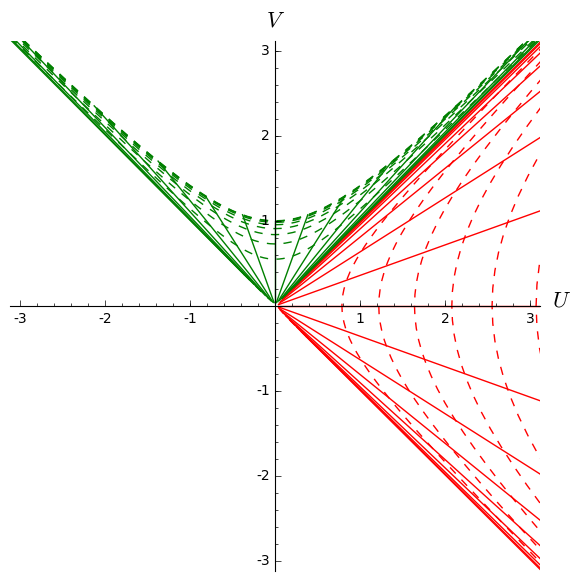

In [92]:
graphI = X_I.plot(X_KS, ranges={t:(-12,12), r:(2.001,5)}, nb_values={t:17, r:9}, 
                  fixed_coords={th:pi/2,ph:0}, ambient_coords=(U,V), 
                  style={t:'--', r:'-'}, parameters={m:1})
graphII = X_II.plot(X_KS, ranges={t:(-12,12), r:(0.001,1.999)}, nb_values={t:17, r:9}, 
                    fixed_coords={th:pi/2,ph:0}, ambient_coords=(U,V), 
                    style={t:'--', r:'-'}, color='green', parameters={m:1})
show(graphI+graphII, xmin=-3, xmax=3, ymin=-3, ymax=3, axes_labels=['$U$', '$V$'])

<p>We may add to the graph the singularity $r=0$ as a Boyer-Lindquist chart plot with $(r,\theta,\phi)$ fixed at $(0, \pi/2, 0)$.  Similarly, we add the event horizon $r=2m$ as a Boyer-Lindquist chart plot with $(r,\theta,\phi)$ fixed at $(2.00001m, \pi/2, 0)$:</p>

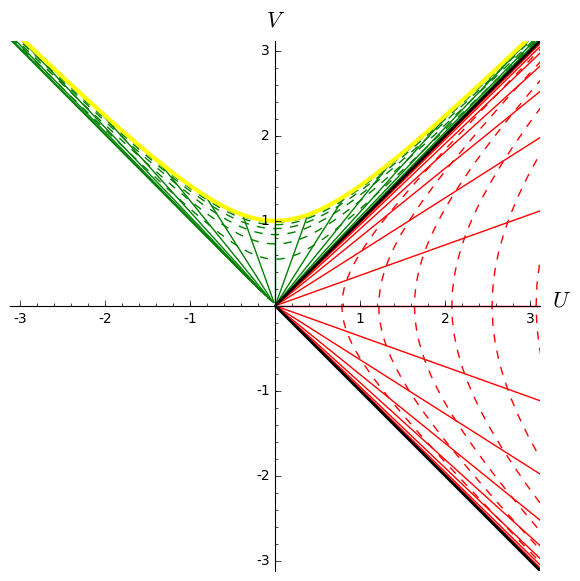

In [93]:
graph_r0 = X_II.plot(X_KS, fixed_coords={r:0, th:pi/2, ph:0}, ambient_coords=(U,V),
                     color='yellow', thickness=3, parameters={m:1})
graph_r2 = X_I.plot(X_KS, ranges={t:(-40,40)}, fixed_coords={r:2.00001, th:pi/2, ph:0},
                    ambient_coords=(U,V), color='black', thickness=2, parameters={m:1})
show(graphI+graphII+graph_r0+graph_r2, xmin=-3, xmax=3, ymin=-3, ymax=3, 
     axes_labels=['$U$', '$V$'])

<h3>Plot of the Eddington-Finkelstein coordinates in terms of the Kruskal ones</h3>
<p>We first get the change of coordinates $(v,r,\theta,\phi) \mapsto (U,V,\theta,\phi)$ by composing the change $(v,r,\theta,\phi) \mapsto (t,r,\theta,\phi)$ with $(t,r,\theta,\phi) \mapsto (U,V,\theta,\phi)$: </p>

In [94]:
ch_EF_KS_I = ch_BL_KS_I * ch_EF_BL_I
ch_EF_KS_I

Change of coordinates from Chart (R_I, (v, r, th, ph)) to Chart (R_I, (U, V, th, ph))

In [95]:
ch_EF_KS_I.display()

U = 1/2*sqrt(2)*sqrt(-2*m + r)*cosh(1/4*(2*m*log(2) + 2*m*log(m) - 2*m*log(-2*m + r) - r + v)/m)*e^(1/4*r/m)/sqrt(m)
V = 1/2*sqrt(2)*sqrt(-2*m + r)*e^(1/4*r/m)*sinh(1/4*(2*m*log(2) + 2*m*log(m) - 2*m*log(-2*m + r) - r + v)/m)/sqrt(m)
th = th
ph = ph

In [96]:
ch_EF_KS_II = ch_BL_KS_II * ch_EF_BL_II
ch_EF_KS_II

Change of coordinates from Chart (R_II, (v, r, th, ph)) to Chart (R_II, (U, V, th, ph))

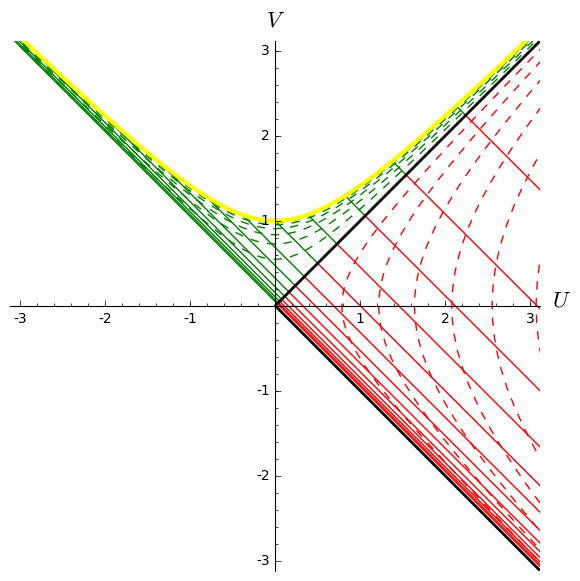

In [97]:
graphI_EF = X_EF_I.plot(X_KS, ranges={v:(-12,12), r:(2.001,5)}, nb_values={v:17, r:9},
                        fixed_coords={th:pi/2,ph:0}, ambient_coords=(U,V),
                        style={v:'--', r:'-'}, parameters={m:1})
graphII_EF = X_EF_II.plot(X_KS, ranges={v:(-12,12), r:(0.001,1.999)}, nb_values={v:17, r:9},
                          fixed_coords={th:pi/2,ph:0}, ambient_coords=(U,V),
                          style={v:'--', r:'-'}, color='green', parameters={m:1})
show(graphI_EF+graphII_EF+graph_r0+graph_r2, xmin=-3, xmax=3, ymin=-3, ymax=3,
     axes_labels=['$U$', '$V$'])

<p>There are now 9 charts defined on the spacetime manifold:</p>

In [98]:
M.atlas()

[Chart (R_I_union_R_II, (t, r, th, ph)),
 Chart (R_I, (t, r, th, ph)),
 Chart (R_II, (t, r, th, ph)),
 Chart (R_I_union_R_II, (v, r, th, ph)),
 Chart (R_I, (v, r, th, ph)),
 Chart (R_II, (v, r, th, ph)),
 Chart (R_I_union_R_II_union_R_III_union_R_IV, (U, V, th, ph)),
 Chart (R_I, (U, V, th, ph)),
 Chart (R_II, (U, V, th, ph))]

In [99]:
len(M.atlas())

9

<p>There are 8 explicit coordinate changes (the coordinate change KS $\rightarrow$ BL is not known in explicit form):</p>

In [100]:
M.coord_changes()

{(Chart (R_II, (v, r, th, ph)),
  Chart (R_II, (U, V, th, ph))): Change of coordinates from Chart (R_II, (v, r, th, ph)) to Chart (R_II, (U, V, th, ph)),
 (Chart (R_II, (v, r, th, ph)),
  Chart (R_II, (t, r, th, ph))): Change of coordinates from Chart (R_II, (v, r, th, ph)) to Chart (R_II, (t, r, th, ph)),
 (Chart (R_I, (v, r, th, ph)),
  Chart (R_I, (U, V, th, ph))): Change of coordinates from Chart (R_I, (v, r, th, ph)) to Chart (R_I, (U, V, th, ph)),
 (Chart (R_I, (v, r, th, ph)),
  Chart (R_I, (t, r, th, ph))): Change of coordinates from Chart (R_I, (v, r, th, ph)) to Chart (R_I, (t, r, th, ph)),
 (Chart (R_II, (t, r, th, ph)),
  Chart (R_II, (U, V, th, ph))): Change of coordinates from Chart (R_II, (t, r, th, ph)) to Chart (R_II, (U, V, th, ph)),
 (Chart (R_II, (t, r, th, ph)),
  Chart (R_II, (v, r, th, ph))): Change of coordinates from Chart (R_II, (t, r, th, ph)) to Chart (R_II, (v, r, th, ph)),
 (Chart (R_I, (t, r, th, ph)),
  Chart (R_I, (U, V, th, ph))): Change of coordinates from Chart (R_I, (t, r, th, ph)) to Chart (R_I, (U, V, th, ph)),
 (Chart (R_I, (t, r, th, ph)),
  Chart (R_I, (v, r, th, ph))): Change of coordinates from Chart (R_I, (t, r, th, ph)) to Chart (R_I, (v, r, th, ph))}

In [101]:
len(M.coord_changes())

8

<p>There are 10 vector frames (among which 9 coordinate frames):</p>

In [102]:
M.frames()

[Coordinate frame (R_I_union_R_II, (d/dt,d/dr,d/dth,d/dph)),
 Coordinate frame (R_I, (d/dt,d/dr,d/dth,d/dph)),
 Coordinate frame (R_II, (d/dt,d/dr,d/dth,d/dph)),
 Coordinate frame (R_I_union_R_II, (d/dv,d/dr,d/dth,d/dph)),
 Coordinate frame (R_I, (d/dv,d/dr,d/dth,d/dph)),
 Coordinate frame (R_II, (d/dv,d/dr,d/dth,d/dph)),
 Vector frame (R_I, (e_0,e_1,e_2,e_3)),
 Coordinate frame (R_I_union_R_II_union_R_III_union_R_IV, (d/dU,d/dV,d/dth,d/dph)),
 Coordinate frame (R_I, (d/dU,d/dV,d/dth,d/dph)),
 Coordinate frame (R_II, (d/dU,d/dV,d/dth,d/dph))]

In [103]:
len(M.frames())

10

<p>There are 14 fields of tangent space automorphisms expressing the changes of coordinate bases and tetrad:</p>

In [104]:
len(M.changes_of_frame())

14

<p>Thanks to these changes of frames, the components of the metric tensor with respect to the Kruskal-Szekeres can be computed by the method <span style="font-family: courier new,courier;">display()</span> and are found to be:</p>

In [105]:
g.display(X_KS_I.frame())

g = 32*m^3*e^(-1/2*r/m)/r dU*dU - 32*m^3*e^(-1/2*r/m)/r dV*dV + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [106]:
g[X_KS_I.frame(),:]

[ 32*m^3*e^(-1/2*r/m)/r                      0                      0                      0]
[                     0 -32*m^3*e^(-1/2*r/m)/r                      0                      0]
[                     0                      0                    r^2                      0]
[                     0                      0                      0          r^2*sin(th)^2]

In [107]:
g.display(X_KS_II.frame())

g = 32*m^3*e^(-1/2*r/m)/r dU*dU - 32*m^3*e^(-1/2*r/m)/r dV*dV + r^2 dth*dth + r^2*sin(th)^2 dph*dph

<p>The first vector of the orthonormal tetrad $e$ expressed on the <span id="cell_outer_86"><span id="cell_outer_121">Kruskal-Szekeres</span></span> frame:</p>

In [108]:
e[0].display(X_KS_I.frame())

e_0 = 1/8*sqrt(2)*sqrt(r)*e^(1/4*r/m)*sinh(1/4*t/m)/m^(3/2) d/dU + 1/8*sqrt(2)*sqrt(r)*cosh(1/4*t/m)*e^(1/4*r/m)/m^(3/2) d/dV

<p>The Riemann curvature tensor in terms of the <span id="cell_outer_121">Kruskal-Szekeres</span> coordinates:</p>

In [109]:
g.riemann().display(X_KS_I.frame())

Riem(g) = -64*m^4*e^(-1/2*r/m)/r^4 d/dU*dV*dU*dV + 64*m^4*e^(-1/2*r/m)/r^4 d/dU*dV*dV*dU - m/r d/dU*dth*dU*dth + m/r d/dU*dth*dth*dU - m*sin(th)^2/r d/dU*dph*dU*dph + m*sin(th)^2/r d/dU*dph*dph*dU - 64*m^4*e^(-1/2*r/m)/r^4 d/dV*dU*dU*dV + 64*m^4*e^(-1/2*r/m)/r^4 d/dV*dU*dV*dU - m/r d/dV*dth*dV*dth + m/r d/dV*dth*dth*dV - m*sin(th)^2/r d/dV*dph*dV*dph + m*sin(th)^2/r d/dV*dph*dph*dV + 32*m^4*e^(-1/2*r/m)/r^4 d/dth*dU*dU*dth - 32*m^4*e^(-1/2*r/m)/r^4 d/dth*dU*dth*dU - 32*m^4*e^(-1/2*r/m)/r^4 d/dth*dV*dV*dth + 32*m^4*e^(-1/2*r/m)/r^4 d/dth*dV*dth*dV + 2*m*sin(th)^2/r d/dth*dph*dth*dph - 2*m*sin(th)^2/r d/dth*dph*dph*dth + 32*m^4*e^(-1/2*r/m)/r^4 d/dph*dU*dU*dph - 32*m^4*e^(-1/2*r/m)/r^4 d/dph*dU*dph*dU - 32*m^4*e^(-1/2*r/m)/r^4 d/dph*dV*dV*dph + 32*m^4*e^(-1/2*r/m)/r^4 d/dph*dV*dph*dV - 2*m/r d/dph*dth*dth*dph + 2*m/r d/dph*dth*dph*dth

In [110]:
g.riemann().display_comp(X_KS_I.frame(), only_nonredundant=True)

Riem(g)^U_V,U,V = -64*m^4*e^(-1/2*r/m)/r^4 
Riem(g)^U_th,U,th = -m/r 
Riem(g)^U_ph,U,ph = -m*sin(th)^2/r 
Riem(g)^V_U,U,V = -64*m^4*e^(-1/2*r/m)/r^4 
Riem(g)^V_th,V,th = -m/r 
Riem(g)^V_ph,V,ph = -m*sin(th)^2/r 
Riem(g)^th_U,U,th = 32*m^4*e^(-1/2*r/m)/r^4 
Riem(g)^th_V,V,th = -32*m^4*e^(-1/2*r/m)/r^4 
Riem(g)^th_ph,th,ph = 2*m*sin(th)^2/r 
Riem(g)^ph_U,U,ph = 32*m^4*e^(-1/2*r/m)/r^4 
Riem(g)^ph_V,V,ph = -32*m^4*e^(-1/2*r/m)/r^4 
Riem(g)^ph_th,th,ph = -2*m/r

<p>The curvature 2-form $\Omega^0_{\ \, 1}$ associated to the Kruskal-Szekeres coordinate frame:</p>

In [111]:
om = g.connection().curvature_form(0,1, X_KS_I.frame()) ; print(om)

2-form curvature (0,1) of connection nabla_g w.r.t. Coordinate frame (R_I, (d/dU,d/dV,d/dth,d/dph)) on the Open subset R_I of the 4-dimensional differentiable manifold M


In [112]:
om.display(X_KS_I.frame())

curvature (0,1) of connection nabla_g w.r.t. Coordinate frame (R_I, (d/dU,d/dV,d/dth,d/dph)) = -64*m^4*e^(-1/2*r/m)/r^4 dU/\dV

<h2>Isotropic coordinates</h2>
<p>Let us now introduce isotropic coordinates $(t,\bar{r},\theta,\varphi)$ on the spacetime manifold:</p>

In [113]:
regI_III = regI.union(regIII) ; regI_III

Open subset R_I_union_R_III of the 4-dimensional differentiable manifold M

In [114]:
X_iso.<t,ri,th,ph> = regI_III.chart(r't ri:(0,+oo):\bar{r} th:(0,pi):\theta ph:(0,2*pi):\varphi')
print(X_iso) ; X_iso

Chart (R_I_union_R_III, (t, ri, th, ph))


Chart (R_I_union_R_III, (t, ri, th, ph))

In [115]:
X_iso_I = X_iso.restrict(regI, ri>m/2) ; X_iso_I

Chart (R_I, (t, ri, th, ph))

<p>The transformation from the isotropic coordinates to the Boyer-Lindquist ones:</p>

In [116]:
assume(2*ri>m) # we consider only region I
ch_iso_BL_I = X_iso_I.transition_map(X_I, [t, ri*(1+m/(2*ri))^2, th, ph])
print(ch_iso_BL_I)
ch_iso_BL_I.display()

Change of coordinates from Chart (R_I, (t, ri, th, ph)) to Chart (R_I, (t, r, th, ph))


t = t
r = 1/4*ri*(m/ri + 2)^2
th = th
ph = ph

In [132]:
assume(r>2*m) # we consider only region I
ch_iso_BL_I.set_inverse(t, (r-m+sqrt(r*(r-2*m)))/2, th, ph, verbose=True)

Check of the inverse coordinate transformation:
  t == t
  ri == ri
  th == th
  ph == ph
  t == t
  r == r
  th == th
  ph == ph


In [118]:
ch_iso_BL_I.inverse().display()

t = t
ri = -1/2*m + 1/2*r + 1/2*sqrt(-(2*m - r)*r)
th = th
ph = ph

<p><span id="cell_outer_90">At this stage, 11 charts have been defined on the manifold $\mathcal{M}$:</span></p>

In [119]:
M.atlas()

[Chart (R_I_union_R_II, (t, r, th, ph)),
 Chart (R_I, (t, r, th, ph)),
 Chart (R_II, (t, r, th, ph)),
 Chart (R_I_union_R_II, (v, r, th, ph)),
 Chart (R_I, (v, r, th, ph)),
 Chart (R_II, (v, r, th, ph)),
 Chart (R_I_union_R_II_union_R_III_union_R_IV, (U, V, th, ph)),
 Chart (R_I, (U, V, th, ph)),
 Chart (R_II, (U, V, th, ph)),
 Chart (R_I_union_R_III, (t, ri, th, ph)),
 Chart (R_I, (t, ri, th, ph))]

In [120]:
len(M.atlas())

11

<p>12 vector frames have been defined on $\mathcal{M}$: 11 coordinate bases and the tetrad $(e_\alpha)$:</p>

In [121]:
M.frames()

[Coordinate frame (R_I_union_R_II, (d/dt,d/dr,d/dth,d/dph)),
 Coordinate frame (R_I, (d/dt,d/dr,d/dth,d/dph)),
 Coordinate frame (R_II, (d/dt,d/dr,d/dth,d/dph)),
 Coordinate frame (R_I_union_R_II, (d/dv,d/dr,d/dth,d/dph)),
 Coordinate frame (R_I, (d/dv,d/dr,d/dth,d/dph)),
 Coordinate frame (R_II, (d/dv,d/dr,d/dth,d/dph)),
 Vector frame (R_I, (e_0,e_1,e_2,e_3)),
 Coordinate frame (R_I_union_R_II_union_R_III_union_R_IV, (d/dU,d/dV,d/dth,d/dph)),
 Coordinate frame (R_I, (d/dU,d/dV,d/dth,d/dph)),
 Coordinate frame (R_II, (d/dU,d/dV,d/dth,d/dph)),
 Coordinate frame (R_I_union_R_III, (d/dt,d/dri,d/dth,d/dph)),
 Coordinate frame (R_I, (d/dt,d/dri,d/dth,d/dph))]

In [122]:
len(M.frames())

12

<p>The components of the metric tensor in terms of the isotropic coordinates are given by</p>

In [123]:
g.display(X_iso_I.frame(), X_iso_I)

g = -(m^2 - 4*m*ri + 4*ri^2)/(m^2 + 4*m*ri + 4*ri^2) dt*dt + 1/16*(m^4 + 8*m^3*ri + 24*m^2*ri^2 + 32*m*ri^3 + 16*ri^4)/ri^4 dri*dri + 1/16*(m^4 + 8*m^3*ri + 24*m^2*ri^2 + 32*m*ri^3 + 16*ri^4)/ri^2 dth*dth + 1/16*(m^4 + 8*m^3*ri + 24*m^2*ri^2 + 32*m*ri^3 + 16*ri^4)*sin(th)^2/ri^2 dph*dph

<p>The $g_{00}$ component can be factorized:</p>

In [124]:
g[X_iso_I.frame(), 0,0, X_iso_I]

-(m^2 - 4*m*ri + 4*ri^2)/(m^2 + 4*m*ri + 4*ri^2)

In [125]:
g[X_iso_I.frame(), 0,0, X_iso_I].factor()

-(m - 2*ri)^2/(m + 2*ri)^2

<p>Let us also factorize the other components:</p>

In [126]:
for i in range(1,4):
    g[X_iso_I.frame(), i,i, X_iso_I].factor()

<p>The output of the <span style="font-family: courier new,courier;">display()</span> command looks nicer:</p>

In [127]:
g.display(X_iso_I.frame(), X_iso_I)

g = -(m - 2*ri)^2/(m + 2*ri)^2 dt*dt + 1/16*(m + 2*ri)^4/ri^4 dri*dri + 1/16*(m + 2*ri)^4/ri^2 dth*dth + 1/16*(m + 2*ri)^4*sin(th)^2/ri^2 dph*dph

<p>Expression of the tetrad associated with the static observer in terms of the isotropic coordinate basis:</p>

In [128]:
e[0].display(X_iso_I.frame(), X_iso_I)

e_0 = -(m + 2*ri)/(m - 2*ri) d/dt

In [129]:
e[1].display(X_iso_I.frame(), X_iso_I)

e_1 = 4*ri^2/(m^2 + 4*m*ri + 4*ri^2) d/dri

In [130]:
e[2].display(X_iso_I.frame(), X_iso_I)

e_2 = 4*ri/(m^2 + 4*m*ri + 4*ri^2) d/dth

In [131]:
e[3].display(X_iso_I.frame(), X_iso_I)

e_3 = 4*ri/((m^2 + 4*m*ri + 4*ri^2)*sin(th)) d/dph